In [1]:
# imports
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

# DBSCAN import
from sklearn.cluster import DBSCAN
# Scaler import
from sklearn.preprocessing import MinMaxScaler

# local
from env import get_db_url
import wrangle_zillow as w


# Steps
1. Select variables you want to cluster: 
> `df = df[["col1", "col2"]]`

2. Convert to array & dtype float: 
> `np_array = df.values.astype("float32", copy = False)`

3. Scale to standard normal:
> `scaler = StandardScaler().fit(np_array) np_array = scaler.transform(np_array)`

4. Create DBSCAN object and fit: 
> `dbsc = DBSCAN(eps = .75, min_samples = 15).fit(np_array)`

5. Extract labels: 
> `labels = dbsc.labels_`

6. Add labels back to original dataframe:
> `df['labels'] = labels`

7. Explore:
> `df.labels.value_counts() sns.scatterplot(df.col1, df.col2, hue=df.labels)`

# Exercises
Clustering - DBSCAN


1. Use DBSCAN to detect anomalies in other products from the customers dataset. The database name is grocery_db.


In [2]:
url = get_db_url("grocery_db")

sql = """
select *
from grocery_customers
"""

gc = pd.read_sql(sql, url, index_col="customer_id")
gc.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
customer_id,,,,,,,,
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
fmd = gc[['Fresh','Milk','Frozen','Delicassen']]
fmd.head()

,Fresh,Milk,Frozen,Delicassen
customer_id,,,,
0,12669,9656,214,1338
1,7057,9810,1762,1776
2,6353,8808,2405,7844
3,13265,1196,6404,1788
4,22615,5410,3915,5185


In [4]:
fmd.iloc[0]

Fresh         12669
Milk           9656
Frozen          214
Delicassen     1338
Name: 0, dtype: int64

In [5]:
fmd.values.astype('float32',copy=False)[0]

array([12669.,  9656.,   214.,  1338.], dtype=float32)

In [6]:
fmd_array = fmd.values.astype('float32',copy=False)
fmd_array

array([[12669.,  9656.,   214.,  1338.],
       [ 7057.,  9810.,  1762.,  1776.],
       [ 6353.,  8808.,  2405.,  7844.],
       ...,
       [14531., 15488.,   437.,  1867.],
       [10290.,  1981.,  1038.,  2125.],
       [ 2787.,  1698.,    65.,    52.]], dtype=float32)

In [7]:
fmd_scaled = MinMaxScaler().fit_transform(fmd_array)
fmd_scaled

array([[0.11294005, 0.13072723, 0.0031063 , 0.02784731],
       [0.06289903, 0.13282411, 0.02854842, 0.03698373],
       [0.05662161, 0.11918086, 0.03911643, 0.16355862],
       ...,
       [0.12954311, 0.21013576, 0.00677142, 0.03888194],
       [0.09172701, 0.02622442, 0.01664914, 0.04426366],
       [0.02482434, 0.02237109, 0.00065742, 0.00102211]], dtype=float32)

In [8]:
fmd.columns

Index(['Fresh', 'Milk', 'Frozen', 'Delicassen'], dtype='object')

In [9]:
[f's_{col}' for col in fmd.columns]

['s_Fresh', 's_Milk', 's_Frozen', 's_Delicassen']

In [10]:
s_col = [f's_{col}' for col in fmd.columns]

In [11]:
gc_backup = gc.copy()

In [12]:
s_gc = pd.DataFrame(fmd_scaled,columns=s_col)

In [13]:
s_gc

,s_Fresh,s_Milk,s_Frozen,s_Delicassen
0,0.112940,0.130727,0.003106,0.027847
1,0.062899,0.132824,0.028548,0.036984
2,0.056622,0.119181,0.039116,0.163559
3,0.118254,0.015536,0.104842,0.037234
4,0.201626,0.072914,0.063934,0.108093
...,...,...,...,...
435,0.264829,0.163338,0.215469,0.045912
436,0.349761,0.018736,0.073713,0.048874
437,0.129543,0.210136,0.006771,0.038882
438,0.091727,0.026224,0.016649,0.044264


In [14]:
gc.merge(s_gc,on=gc.index)

,key_0,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,s_Fresh,s_Milk,s_Frozen,s_Delicassen
0,0,2,3,12669,9656,7561,214,2674,1338,0.112940,0.130727,0.003106,0.027847
1,1,2,3,7057,9810,9568,1762,3293,1776,0.062899,0.132824,0.028548,0.036984
2,2,2,3,6353,8808,7684,2405,3516,7844,0.056622,0.119181,0.039116,0.163559
3,3,1,3,13265,1196,4221,6404,507,1788,0.118254,0.015536,0.104842,0.037234
4,4,2,3,22615,5410,7198,3915,1777,5185,0.201626,0.072914,0.063934,0.108093
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,435,1,3,29703,12051,16027,13135,182,2204,0.264829,0.163338,0.215469,0.045912
436,436,1,3,39228,1431,764,4510,93,2346,0.349761,0.018736,0.073713,0.048874
437,437,2,3,14531,15488,30243,437,14841,1867,0.129543,0.210136,0.006771,0.038882
438,438,1,3,10290,1981,2232,1038,168,2125,0.091727,0.026224,0.016649,0.044264


In [15]:
gc = gc.merge(s_gc,on=gc.index)
gc = gc.drop(columns='key_0')

In [16]:
gc

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,s_Fresh,s_Milk,s_Frozen,s_Delicassen
0,2,3,12669,9656,7561,214,2674,1338,0.112940,0.130727,0.003106,0.027847
1,2,3,7057,9810,9568,1762,3293,1776,0.062899,0.132824,0.028548,0.036984
2,2,3,6353,8808,7684,2405,3516,7844,0.056622,0.119181,0.039116,0.163559
3,1,3,13265,1196,4221,6404,507,1788,0.118254,0.015536,0.104842,0.037234
4,2,3,22615,5410,7198,3915,1777,5185,0.201626,0.072914,0.063934,0.108093
...,...,...,...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,0.264829,0.163338,0.215469,0.045912
436,1,3,39228,1431,764,4510,93,2346,0.349761,0.018736,0.073713,0.048874
437,2,3,14531,15488,30243,437,14841,1867,0.129543,0.210136,0.006771,0.038882
438,1,3,10290,1981,2232,1038,168,2125,0.091727,0.026224,0.016649,0.044264


In [17]:
dbs_pt1_smp20 = DBSCAN(eps=.1,min_samples=20)
dbs_pt1_smp20.fit(fmd_scaled)

DBSCAN(eps=0.1, min_samples=20)

In [18]:
dbs_pt1_smp20.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1, -1,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [19]:
gc['fmd_labels'] = dbs_pt1_smp20.labels_

In [20]:
gc.sample(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,s_Fresh,s_Milk,s_Frozen,s_Delicassen,fmd_labels
149,1,3,31812,1433,1651,800,113,1440,0.283634,0.018763,0.012737,0.029975,0
390,1,3,3352,1181,1328,5502,311,1000,0.029862,0.015332,0.090017,0.020797,0
360,1,3,19746,2872,2006,2601,468,503,0.176044,0.038356,0.042338,0.010430,0
49,2,3,4967,21412,28921,1798,13583,1163,0.044263,0.290797,0.029140,0.024197,0
128,1,3,140,8847,3823,142,1062,3,0.001222,0.119712,0.001923,0.000000,0


In [21]:
gc.fmd_labels.value_counts()

 0    405
-1     35
Name: fmd_labels, dtype: int64

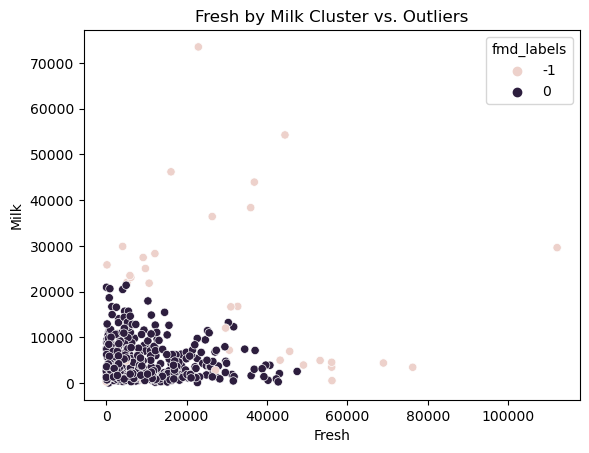

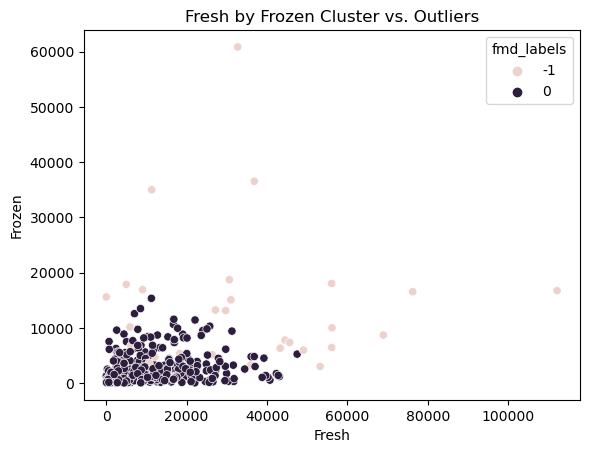

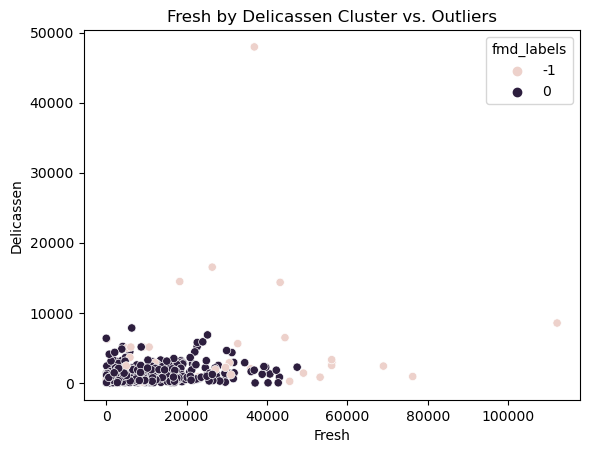

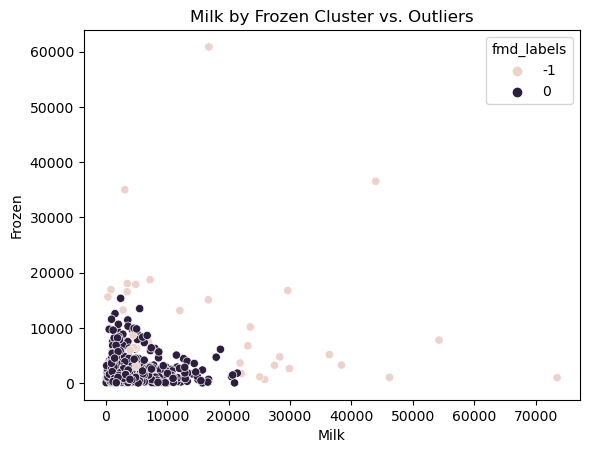

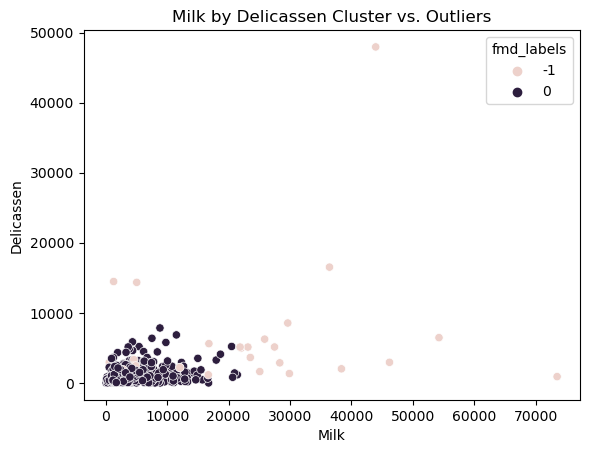

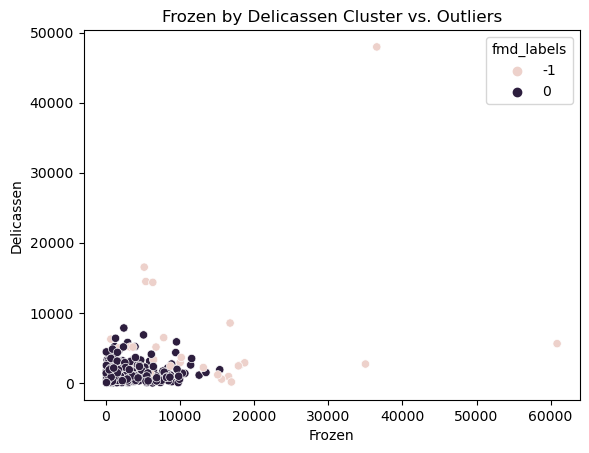

In [22]:
for combo in itertools.combinations(fmd.columns,2):
    sns.scatterplot(x=gc[combo[0]],y=gc[combo[1]],hue=gc.fmd_labels)
    plt.title(f'{combo[0]} by {combo[1]} Cluster vs. Outliers')
    plt.show()

2. Use DBSCAN to detect anomalies in requests from the curriculum access logs in the curriculum_logs database.

In [23]:
# mysql url connection for curriculum logs
url = get_db_url('curriculum_logs')
# mysql query for logs table
query = '''
SELECT  date,
        path as endpoint,
        user_id,
        cohort_id,
        ip as source_ip
FROM logs;
'''
# make logs df from query
cl = pd.read_sql(query, url)

In [24]:
cl = cl.dropna()
cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 847329 entries, 0 to 900222
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   date       847329 non-null  object 
 1   endpoint   847329 non-null  object 
 2   user_id    847329 non-null  int64  
 3   cohort_id  847329 non-null  float64
 4   source_ip  847329 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 38.8+ MB


In [25]:
ucl = cl[['user_id','cohort_id']]
ucl.head()

,user_id,cohort_id
0,1,8.0
1,1,8.0
2,1,8.0
3,1,8.0
4,2,22.0


In [26]:
ucl_array = ucl.values.astype('float32',copy=False)


In [27]:
ucl_scaled = MinMaxScaler().fit_transform(ucl_array)
ucl_scaled

array([[0.        , 0.05072464],
       [0.        , 0.05072464],
       [0.        , 0.05072464],
       ...,
       [0.06428571, 0.19565219],
       [0.7581632 , 0.19565219],
       [0.06428571, 0.19565219]], dtype=float32)

In [28]:
s_ucl_col = [f's_{col}' for col in ucl.columns]

In [29]:
ucl_backup = ucl.copy()

In [30]:
s_ucl = pd.DataFrame(ucl_scaled,columns=s_ucl_col)

In [31]:
s_ucl

,s_user_id,s_cohort_id
0,0.000000,0.050725
1,0.000000,0.050725
2,0.000000,0.050725
3,0.000000,0.050725
4,0.001020,0.152174
...,...,...
847324,0.064286,0.195652
847325,0.064286,0.195652
847326,0.064286,0.195652
847327,0.758163,0.195652


In [32]:
ucl

,user_id,cohort_id
0,1,8.0
1,1,8.0
2,1,8.0
3,1,8.0
4,2,22.0
...,...,...
900218,64,28.0
900219,64,28.0
900220,64,28.0
900221,744,28.0


In [33]:
ucl = ucl.merge(s_ucl,on=ucl.index).drop(columns='key_0')
ucl

,user_id,cohort_id,s_user_id,s_cohort_id
0,1,8.0,0.000000,0.050725
1,1,8.0,0.000000,0.050725
2,1,8.0,0.000000,0.050725
3,1,8.0,0.000000,0.050725
4,2,22.0,0.001020,0.152174
...,...,...,...,...
847324,64,28.0,0.064286,0.195652
847325,64,28.0,0.064286,0.195652
847326,64,28.0,0.064286,0.195652
847327,744,28.0,0.758163,0.195652


In [34]:
ucl.describe()

,user_id,cohort_id,s_user_id,s_cohort_id
count,847329.000000,847329.000000,847329.000000,847329.000000
mean,456.707192,48.501042,0.465007,0.344210
std,250.734309,32.795501,0.255748,0.237783
min,1.000000,1.000000,0.000000,0.000000
25%,263.000000,28.000000,0.267347,0.195652
50%,476.000000,33.000000,0.484694,0.231884
75%,648.000000,57.000000,0.660204,0.405797
max,981.000000,139.000000,1.000000,1.000000


In [35]:
ucl_test = ucl.drop_duplicates()
ucl_test

,user_id,cohort_id,s_user_id,s_cohort_id
0,1,8.0,0.000000,0.050725
4,2,22.0,0.001020,0.152174
6,3,22.0,0.002041,0.152174
9,4,22.0,0.003061,0.152174
10,5,22.0,0.004082,0.152174
...,...,...,...,...
833988,977,139.0,0.995918,1.000000
833992,978,139.0,0.996939,1.000000
833996,979,139.0,0.997959,1.000000
835279,980,28.0,0.998980,0.195652


In [36]:
ucl_scaled

array([[0.        , 0.05072464],
       [0.        , 0.05072464],
       [0.        , 0.05072464],
       ...,
       [0.06428571, 0.19565219],
       [0.7581632 , 0.19565219],
       [0.06428571, 0.19565219]], dtype=float32)

In [37]:
dbs_pt1_smp20 = DBSCAN(eps=.1,min_samples=20)
dbs_pt1_smp20.fit(np.array(ucl_test[['s_user_id','s_cohort_id']],dtype='float32'))

DBSCAN(eps=0.1, min_samples=20)

In [38]:
dbs_pt1_smp20.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [39]:
ucl_test['ucl_labels'] = dbs_pt1_smp20.labels_

/var/folders/ml/8_q6055n29vf0c36kmj6w1900000gn/T/ipykernel_86625/3860933122.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ucl_test['ucl_labels'] = dbs_pt1_smp20.labels_


In [40]:
ucl_test.ucl_labels.value_counts()

 0    488
 1    263
 2    173
-1     28
Name: ucl_labels, dtype: int64

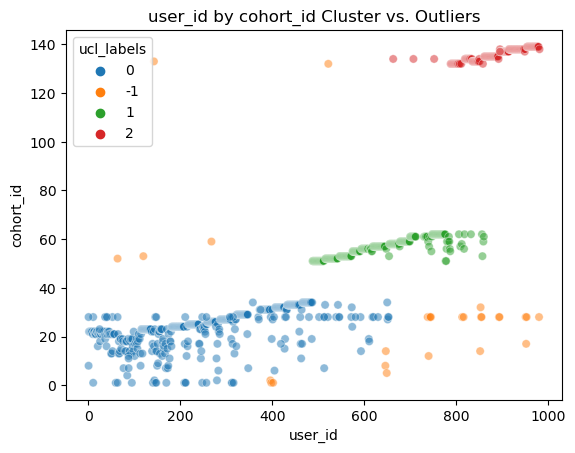

In [41]:
for combo in itertools.combinations(ucl_test.columns[:2],2):
    sns.scatterplot(x=ucl_test[combo[0]],y=ucl_test[combo[1]],alpha=.5,hue=ucl_test.ucl_labels.astype(str))
    plt.title(f'{combo[0]} by {combo[1]} Cluster vs. Outliers')
    plt.show()

In [42]:
ucl_test[ucl_test.ucl_labels==-1]

,user_id,cohort_id,s_user_id,s_cohort_id,ucl_labels
213775,396,2.0,0.403061,0.007246,-1
217543,398,1.0,0.405102,0.000000,-1
237799,402,1.0,0.409184,0.000000,-1
401227,120,53.0,0.121429,0.376812,-1
406321,64,52.0,0.064286,0.369565,-1
480215,646,8.0,0.658163,0.050725,-1
480705,647,14.0,0.659184,0.094203,-1
507760,649,5.0,0.661224,0.028986,-1
569240,268,59.0,0.272449,0.420290,-1
596149,738,28.0,0.752041,0.195652,-1


3. Use DBSCAN to detect anomalies in number of bedrooms and finished square feet of property for the filtered dataset you used in the clustering evaluation exercises (single unit properties with a logerror).

In [43]:
df = w.wrangle_zillow()
df_backup = df

In [44]:
df = df_backup
df

,yearbuilt,age,old_home,bathroomcnt,bedroomcnt,roomcnt,garagecarcnt,has_garage,calculatedfinishedsquarefeet,latitude,...,rtb_tract,propertylandusedesc,airconditioningdesc,heatingorsystemdesc,taxvaluedollarcnt,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,transactiondate
0,1998.0,19.0,False,3.5,4.0,8.0,2.0,True,3100.0,33634931.0,...,630.07,Single Family Residential,None,Yes,1023282.0,485713.0,537569.0,11013.72,0.025595,2017-01-01
1,1967.0,50.0,True,1.0,2.0,5.0,1.0,True,1465.0,34449266.0,...,10.02,Single Family Residential,None,Yes,464000.0,88000.0,376000.0,5672.48,0.055619,2017-01-01
2,1962.0,55.0,True,2.0,3.0,6.0,2.0,True,1243.0,33886168.0,...,218.02,Single Family Residential,None,Yes,564778.0,85289.0,479489.0,6488.30,0.005383,2017-01-01
3,1970.0,47.0,True,3.0,4.0,7.0,0.0,False,2376.0,34245180.0,...,3001.00,Single Family Residential,None,Central,145143.0,108918.0,36225.0,1777.51,-0.103410,2017-01-01
4,1964.0,53.0,True,3.0,3.0,6.0,0.0,False,1312.0,34185120.0,...,1236.01,Condominium,Central,Central,119407.0,73681.0,45726.0,1533.89,0.006940,2017-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77608,1980.0,37.0,True,3.0,3.0,6.0,0.0,False,1741.0,34202400.0,...,1319.00,Condominium,Central,Central,379000.0,265000.0,114000.0,4685.34,-0.002245,2017-09-20
77609,1940.0,77.0,True,2.0,2.0,4.0,0.0,False,1286.0,34245368.0,...,1014.00,Single Family Residential,None,Central,354621.0,70917.0,283704.0,4478.43,0.020615,2017-09-20
77610,1964.0,53.0,True,2.0,4.0,7.0,2.0,True,1612.0,34300140.0,...,84.02,Single Family Residential,None,Yes,67205.0,50683.0,16522.0,1107.48,0.013209,2017-09-21
77611,1954.0,63.0,True,1.0,3.0,4.0,0.0,False,1032.0,34040895.0,...,4338.02,Single Family Residential,Central,Central,49546.0,32797.0,16749.0,876.43,0.037129,2017-09-21


In [45]:
bc = df[['bedroomcnt','calculatedfinishedsquarefeet']]
bc

,bedroomcnt,calculatedfinishedsquarefeet
0,4.0,3100.0
1,2.0,1465.0
2,3.0,1243.0
3,4.0,2376.0
4,3.0,1312.0
...,...,...
77608,3.0,1741.0
77609,2.0,1286.0
77610,4.0,1612.0
77611,3.0,1032.0


In [46]:
bc_array = bc.values.astype('float32',copy=False)
bc_array

array([[4.000e+00, 3.100e+03],
       [2.000e+00, 1.465e+03],
       [3.000e+00, 1.243e+03],
       ...,
       [4.000e+00, 1.612e+03],
       [3.000e+00, 1.032e+03],
       [3.000e+00, 1.762e+03]], dtype=float32)

In [47]:
bc_scaled = w.StandardScaler().fit_transform(bc_array)
bc_scaled

array([[ 0.9769895 ,  1.4564061 ],
       [-0.9891797 , -0.3055759 ],
       [-0.00609506, -0.5448175 ],
       ...,
       [ 0.9769895 , -0.14715916],
       [-0.00609506, -0.7722048 ],
       [-0.00609506,  0.01449056]], dtype=float32)

In [48]:
bc.columns

Index(['bedroomcnt', 'calculatedfinishedsquarefeet'], dtype='object')

In [49]:
s_bc_col = [f's_{col}' for col in bc.columns]

In [50]:
bc_backup = bc.copy()

In [51]:
s_bc = pd.DataFrame(bc_scaled,columns=s_bc_col)
s_bc

,s_bedroomcnt,s_calculatedfinishedsquarefeet
0,0.976990,1.456406
1,-0.989180,-0.305576
2,-0.006095,-0.544818
3,0.976990,0.676177
4,-0.006095,-0.470459
...,...,...
71770,-0.006095,-0.008140
71771,-0.989180,-0.498478
71772,0.976990,-0.147159
71773,-0.006095,-0.772205


In [52]:
bc = bc.merge(s_bc,on=bc.index).drop(columns='key_0')
bc

,bedroomcnt,calculatedfinishedsquarefeet,s_bedroomcnt,s_calculatedfinishedsquarefeet
0,4.0,3100.0,0.976990,1.456406
1,2.0,1465.0,-0.989180,-0.305576
2,3.0,1243.0,-0.006095,-0.544818
3,4.0,2376.0,0.976990,0.676177
4,3.0,1312.0,-0.006095,-0.470459
...,...,...,...,...
71770,3.0,1741.0,-0.006095,-0.008140
71771,2.0,1286.0,-0.989180,-0.498478
71772,4.0,1612.0,0.976990,-0.147159
71773,3.0,1032.0,-0.006095,-0.772205


In [53]:
dbs_pt1_smp20.fit(bc_scaled)

DBSCAN(eps=0.1, min_samples=20)

In [54]:
dbs_pt1_smp20.labels_

array([0, 1, 2, ..., 0, 2, 2])

In [55]:
bc['bc_labels'] = dbs_pt1_smp20.labels_

In [56]:
bc

,bedroomcnt,calculatedfinishedsquarefeet,s_bedroomcnt,s_calculatedfinishedsquarefeet,bc_labels
0,4.0,3100.0,0.976990,1.456406,0
1,2.0,1465.0,-0.989180,-0.305576,1
2,3.0,1243.0,-0.006095,-0.544818,2
3,4.0,2376.0,0.976990,0.676177,0
4,3.0,1312.0,-0.006095,-0.470459,2
...,...,...,...,...,...
71770,3.0,1741.0,-0.006095,-0.008140,2
71771,2.0,1286.0,-0.989180,-0.498478,1
71772,4.0,1612.0,0.976990,-0.147159,0
71773,3.0,1032.0,-0.006095,-0.772205,2


In [57]:
bc.bc_labels.value_counts()

 2     28917
 1     18513
 0     15806
 4      3830
 5      3308
-1       692
 3       394
 7       188
 6        37
 9        32
 8        29
 10       29
Name: bc_labels, dtype: int64

In [58]:
bc = bc.assign(anomaly=bc.bc_labels==-1)

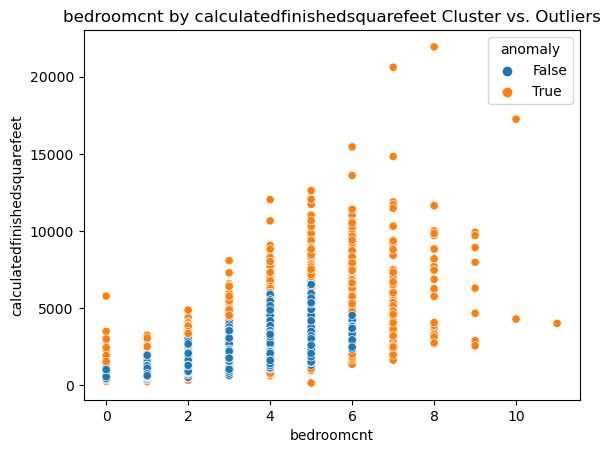

In [59]:
for combo in itertools.combinations(bc_backup.columns,2):
    sns.scatterplot(x=bc[combo[0]],y=bc[combo[1]],hue=bc.anomaly)
    plt.title(f'{combo[0]} by {combo[1]} Cluster vs. Outliers')
    plt.show()